In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [3]:
cities

['esso',
 'ulladulla',
 'tarakan',
 'rikitea',
 'tabou',
 'atuona',
 'barrow',
 'sosua',
 'longyearbyen',
 'rawson',
 'guadalajara',
 'geraldton',
 'vaini',
 'amderma',
 'abu kamal',
 'punta arenas',
 'port elizabeth',
 'karratha',
 'lebu',
 'castro',
 'leningradskiy',
 'georgetown',
 'east london',
 'nasrullaganj',
 'albany',
 'hailar',
 'kananga',
 'husavik',
 'bambous virieux',
 'alexandria',
 'bluff',
 'ribeira grande',
 'hamilton',
 'malatya',
 'kapaa',
 'hami',
 'mataura',
 'uvat',
 'sitka',
 'solnechnyy',
 'cape town',
 'lavrentiya',
 'airai',
 'syumsi',
 'kodiak',
 'dikson',
 'omutinskoye',
 'mariestad',
 'puerto ayora',
 'avarua',
 'busselton',
 'acajutla',
 'qaanaaq',
 'mount gambier',
 'vorobyevka',
 'taolanaro',
 'mae ramat',
 'banjar',
 'anadyr',
 'belushya guba',
 'san patricio',
 'lorengau',
 'marcona',
 'baykit',
 'tumannyy',
 'hovd',
 'xuddur',
 'port alfred',
 'nikolskoye',
 'saint george',
 'emerald',
 'tasiilaq',
 'new norfolk',
 'at-bashi',
 'chase',
 'serebryanyy 

# Perform API Calls
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
city1="albany"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q={city1}"
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=7e61e7aa8e4c4e0632105cc28d9b7efd&units=metric&q=albany'

In [5]:
response=requests.get(query_url).json()
response

{'coord': {'lon': -73.97, 'lat': 42.6},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': -0.47,
  'feels_like': -5.51,
  'temp_min': -3.33,
  'temp_max': 2.22,
  'pressure': 1019,
  'humidity': 40},
 'visibility': 16093,
 'wind': {'speed': 2.6, 'deg': 290},
 'clouds': {'all': 75},
 'dt': 1580941857,
 'sys': {'type': 1,
  'id': 3273,
  'country': 'US',
  'sunrise': 1580904374,
  'sunset': 1580940808},
 'timezone': -18000,
 'id': 5106841,
 'name': 'Albany',
 'cod': 200}

In [44]:
# set up lists to hold reponse info
query_url = f"{url}appid={api_key}&units={units}&q="
lat = []
temp = []
city_name = []
humidity = []
wind_speed = []
cloudiness = []

# Loop through the list of cities and perform a request for data on each

for index, city in enumerate(cities[:616]):
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        city_name.append(city)
        print("city_number "+str(index)+ " city name: "+city)
        
    except:
        print("city not found")

    

city_number 0 city name: esso
city_number 1 city name: ulladulla
city_number 2 city name: tarakan
city_number 3 city name: rikitea
city_number 4 city name: tabou
city_number 5 city name: atuona
city_number 6 city name: barrow
city_number 7 city name: sosua
city_number 8 city name: longyearbyen
city_number 9 city name: rawson
city_number 10 city name: guadalajara
city_number 11 city name: geraldton
city_number 12 city name: vaini
city not found
city_number 14 city name: abu kamal
city_number 15 city name: punta arenas
city_number 16 city name: port elizabeth
city_number 17 city name: karratha
city_number 18 city name: lebu
city_number 19 city name: castro
city_number 20 city name: leningradskiy
city_number 21 city name: georgetown
city_number 22 city name: east london
city not found
city_number 24 city name: albany
city_number 25 city name: hailar
city_number 26 city name: kananga
city_number 27 city name: husavik
city_number 28 city name: bambous virieux
city_number 29 city name: alexa

# Convert Raw Data to DataFrame
Export the city data into a .csv.
Display the DataFrame

In [45]:
city_df = pd.DataFrame({"City Name":city_name,"Latitude": lat, "Temperature": temp, "Humidity": humidity, 
                        "Wind Speed":wind_speed, "Cloudiness": cloudiness})
city_df

,City Name,Latitude,Temperature,Humidity,Wind Speed,Cloudiness
0,esso,55.93,-29.65,59,0.77,0
1,ulladulla,-35.35,18.54,100,2.60,75
2,tarakan,3.30,27.65,77,2.76,84
3,rikitea,-23.12,26.07,79,7.66,12
4,tabou,4.42,30.05,60,3.32,44
...,...,...,...,...,...,...
563,lazaro cardenas,17.96,24.08,78,0.88,51
564,abha,18.22,18.48,63,6.70,20
565,bitung,1.45,24.00,94,1.32,20
566,kruisfontein,-34.00,16.55,91,3.97,100


# Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot

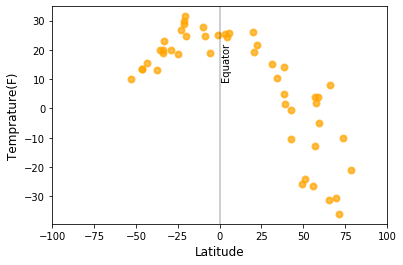

In [24]:
#Temperature (F) vs. Latitude
x = city_df['Latitude']
y = city_df['Temperature']

plt.scatter(x,y ,alpha=0.7, c='orange', edgecolors='orange', linewidths=2)
plt.xlim(-100,100)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Temprature(F)', fontsize = 12)
plt.axvline(0, color = 'black', alpha = .25, label='Equator')
plt.text(1,10,'Equator',rotation=90)
#date = datetime.utcnow()
#plt.title('Temperature (F) vs. Latitude \n (%s)' % date.strftime("%d %b %Y"),fontsize = 12)

#plt.savefig("Graphs/Temperature vs Latitude.png")
plt.show()

plt.close()

# Latitude vs. Humidity Plot

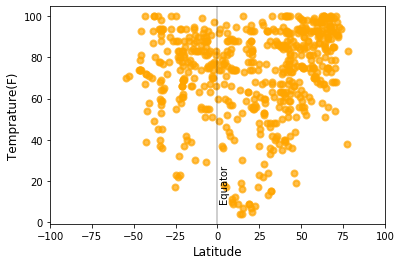

In [46]:
#Temperature (F) vs. Latitude
x = city_df['Latitude']
y = city_df['Humidity']

plt.scatter(x,y ,alpha=0.7, c='orange', edgecolors='orange', linewidths=2)
plt.xlim(-100,100)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Temprature(F)', fontsize = 12)
plt.axvline(0, color = 'black', alpha = .25, label='Equator')
plt.text(1,10,'Equator',rotation=90)
#date = datetime.utcnow()
#plt.title('Temperature (F) vs. Latitude \n (%s)' % date.strftime("%d %b %Y"),fontsize = 12)

#plt.savefig("Graphs/Temperature vs Latitude.png")
plt.show()

plt.close()

# Latitude vs. Cloudiness Plot

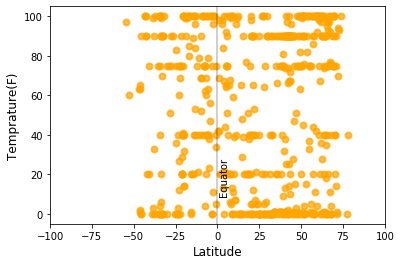

In [47]:
#Temperature (F) vs. Latitude
x = city_df['Latitude']
y = city_df['Cloudiness']

plt.scatter(x,y ,alpha=0.7, c='orange', edgecolors='orange', linewidths=2)
plt.xlim(-100,100)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Temprature(F)', fontsize = 12)
plt.axvline(0, color = 'black', alpha = .25, label='Equator')
plt.text(1,10,'Equator',rotation=90)
#date = datetime.utcnow()
#plt.title('Temperature (F) vs. Latitude \n (%s)' % date.strftime("%d %b %Y"),fontsize = 12)

#plt.savefig("Graphs/Temperature vs Latitude.png")
plt.show()

plt.close()

# Latitude vs. Wind Speed Plot

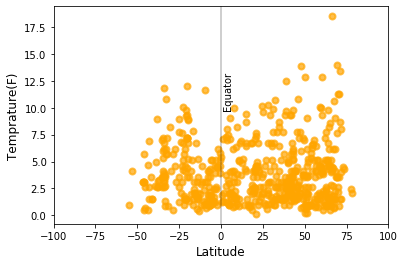

In [50]:
#Temperature (F) vs. Latitude
x = city_df['Latitude']
y = city_df['Wind Speed']

plt.scatter(x,y ,alpha=0.7, c='orange', edgecolors='orange', linewidths=2)
plt.xlim(-100,100)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Temprature(F)', fontsize = 12)
plt.axvline(0, color = 'black', alpha = .25, label='Equator')
plt.text(1,10,'Equator',rotation=90)
#date = datetime.utcnow()
#plt.title('Temperature (F) vs. Latitude \n (%s)' % date.strftime("%d %b %Y"),fontsize = 12)

#plt.savefig("Graphs/Temperature vs Latitude.png")
plt.show()

plt.close()